In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from refer import REFER
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

# Load Refer Dataset

In [2]:
data_root = './data'  # contains refclef, refcoco, refcoco+, refcocog and images
dataset = 'refcoco+'
splitBy = 'unc'
refer = REFER(data_root, dataset, splitBy)

loading dataset refcoco+ into memory...
creating index...
index created.
DONE (t=4.38s)


# Stats about the Dataset

In [5]:
# print(stats about the given dataset)
print('dataset [%s_%s] contains: ' % (dataset, splitBy))
ref_ids = refer.getRefIds()
image_ids = refer.getImgIds()
print('%s expressions for %s refs in %s images.' % (len(refer.Sents), len(ref_ids), len(image_ids)))

print('\nAmong them:')
if dataset == 'refclef':
    if splitBy == 'unc':
        splits = ['train', 'val', 'testA', 'testB', 'testC']
    else:
        splits = ['train', 'val', 'test']
elif dataset == 'refcoco':
    splits = ['train', 'val', 'test']
elif dataset == 'refcoco+':
    splits = ['train', 'val', 'test']
elif dataset == 'refcocog':
    splits = ['train', 'val']  # we don't have test split for refcocog right now.
    
for split in splits:
    ref_ids = refer.getRefIds(split=split)
    print('%s refs are in split [%s].' % (len(ref_ids), split))


dataset [refcoco+_unc] contains: 
141564 expressions for 49856 refs in 19992 images.

Among them:
42278 refs are in split [train].
3805 refs are in split [val].
3773 refs are in split [test].


# Show Refered Object and its Expressions

ref_id [29857] (ann_id [308897])
1. whitest bread
2. sandwich in green box
3. white sandwich in green tray


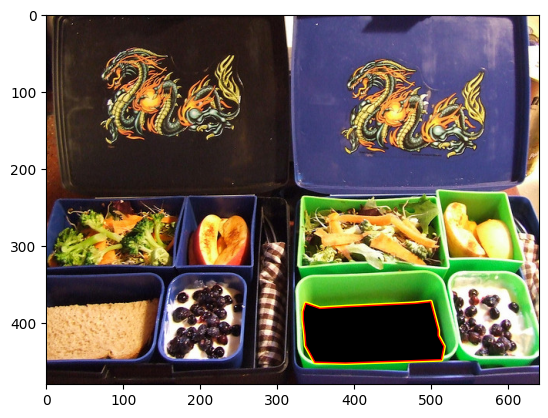

In [12]:
# randomly sample one ref
ref_ids = refer.getRefIds()
ref_id = ref_ids[np.random.randint(0, len(ref_ids))]
ref = refer.Refs[ref_id]
print('ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id']))
# show the segmentation of the referred object
plt.figure()
refer.showRef(ref, seg_box='seg')
plt.show()

In [13]:
ref['file_name']

'COCO_train2014_000000236629_0.jpg'

1. woman in front
2. lady smiling
3. woman


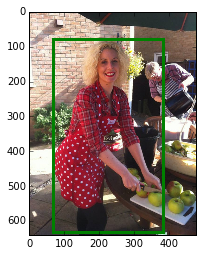

In [25]:
# or show the bounding box of the referred object
refer.showRef(ref, seg_box='box')
plt.show()

In [26]:
# let's look at the details of each ref
for sent in ref['sentences']:
    print 'sent_id[%s]: %s' % (sent['sent_id'], sent['sent'])

sent_id[64727]: woman in front
sent_id[64728]: lady smiling
sent_id[64729]: woman
